In [1]:
import gzip
import os
import numpy as np

train_data = os.path.join("..", "data", "mnist", "train-images-idx3-ubyte.gz")
train_labels = os.path.join("..", "data", "mnist", "train-labels-idx1-ubyte.gz")

test_data = os.path.join("..", "data", "mnist", "t10k-images-idx3-ubyte.gz")
test_labels = os.path.join("..", "data", "mnist", "t10k-labels-idx1-ubyte.gz")

In [2]:
def mnist_images(filename):
    with gzip.open(filename, "rb") as file:
        data = np.frombuffer(file.read(), np.uint8, offset = 16)
        return data.reshape(-1, 28, 28) / 255
    
def mnist_labels(filename):
    with gzip.open(filename, "rb") as file:
        return np.frombuffer(file.read(), np.uint8, offset = 8)

X_train = mnist_images(train_data)[:1000]
y_train = mnist_labels(train_labels)[:1000]

X_test = mnist_images(test_data)[:1000]
y_test = mnist_labels(test_labels)[:1000]

print(X_train.shape)

(1000, 28, 28)


4


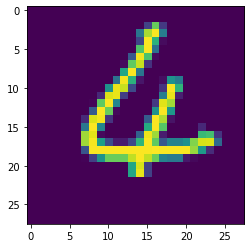

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_train[850])
plt.imshow(X_train[850])
plt.show()

In [4]:
from sklearn.linear_model import LogisticRegression


In [5]:
model = LogisticRegression(solver = "newton-cg", n_jobs = 4)
model.fit(X_train.reshape(-1, 784), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
model.score(X_test.reshape(-1, 784), y_test)

0.837